    Problem Solving  Creativity  Research  Time Management  Communication
0               0.4         0.2       1.0              0.8            0.0
1               1.0         0.4       0.6              0.0            0.2
2               0.0         0.2       0.4              1.0            0.8
3               0.4         0.8       1.0              0.2            0.0
4               0.4         0.6       0.8              0.0            1.0
5               0.2         0.0       1.0              0.6            0.8
6               0.0         1.0       0.8              0.4            0.6
7               0.6         1.0       0.2              0.8            0.0
8               0.2         1.0       0.0              0.8            0.6
9               0.0         0.6       1.0              0.8            0.2
10              0.2         1.0       0.0              0.8            0.6
11              0.8         0.0       1.0              0.2            0.4
12              0.2         0.0       

/Users/pranavpomalapally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (15). Possibly due to duplicate points in X.


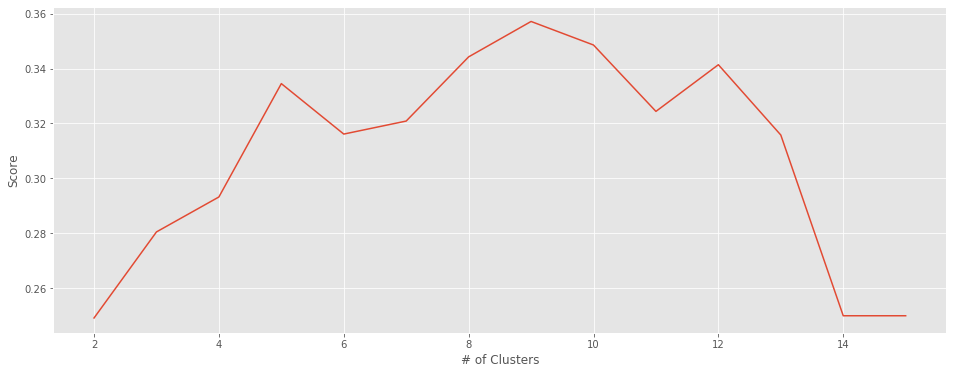

Max Value: Cluster #    Cluster Score
2       1.404936

Min Value: Cluster #     Cluster Score
14   3.678260e-08




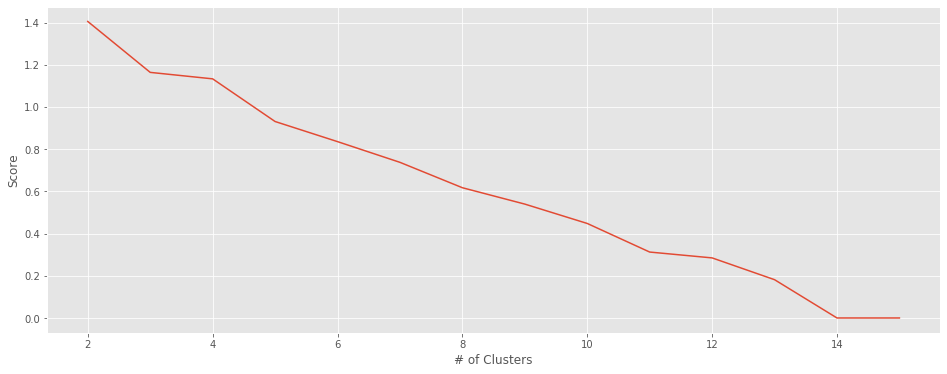

In [2]:
import pandas as pd
import seaborn as sns
# import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.use('tkagg')
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('fakeStudent.csv')

df['Problem Solving'] = df['Rank each skill on the list first to last. [Problem Solving]'].astype(str).str[0]
df['Creativity'] = df['Rank each skill on the list first to last. [Creativity]'].astype(str).str[0]
df['Research'] = df['Rank each skill on the list first to last. [Research]'].astype(str).str[0]
df['Time Management'] = df['Rank each skill on the list first to last. [Time Management]'].astype(str).str[0]
df['Communication'] = df['Rank each skill on the list first to last. [Communication]'].astype(str).str[0]
# df['Critical Thinking'] = df[' [Critical Thinking]'].astype(str).str[0]

newdf = df[['Problem Solving', 'Creativity', 'Research', 'Time Management', 'Communication']]
# print(newdf)


scaler = MinMaxScaler()
new_df = pd.DataFrame(scaler.fit_transform(newdf), columns=newdf.columns[:], index=newdf.index)

print(new_df)
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 16, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(new_df)
    
    cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    k_means = KMeans(n_clusters=i)
    
    k_means.fit(new_df)
    
    cluster_assignments = k_means.predict(new_df)
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(new_df, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(new_df, cluster_assignments))


def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value: Cluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value: Cluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    print('\n')
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)

plot_evaluation(db_scores)


# clustering = AgglomerativeClustering(n_clusters=10)

# # Fitting
# clustering.fit(new_df)

# # Getting cluster assignments
# cluster_assignments = clustering.labels_

# # Unscaling the categories then replacing the scaled values
# df = df[['Best email to reach you']].join(pd.DataFrame(scaler.inverse_transform(newdf), columns=newdf.columns[:], index=newdf.index))

# # Assigning the clusters to each profile
# df['Cluster #'] = cluster_assignments

# # Viewing the dating profiles with cluster assignments
# print(df)
